In [1]:
import pyupbit
import pandas as pd
from datetime import datetime
import time
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [4]:
tickers = pyupbit.get_tickers(fiat="KRW")
theCoin = tickers[0]
to_date = datetime.now()
timeframe = 'minute1'#'minute1' #minute60 #day
df_coin = pyupbit.get_ohlcv(ticker=theCoin, interval=timeframe, to=to_date)
df_coin

,open,high,low,close,volume,value
2022-08-02 09:02:00,30806000.0,30842000.0,30798000.0,30809000.0,7.606993,2.344452e+08
2022-08-02 09:03:00,30839000.0,30842000.0,30812000.0,30840000.0,6.960563,2.145980e+08
2022-08-02 09:04:00,30821000.0,30882000.0,30819000.0,30877000.0,6.139622,1.894701e+08
2022-08-02 09:05:00,30877000.0,30910000.0,30836000.0,30902000.0,10.949115,3.380835e+08
2022-08-02 09:06:00,30890000.0,30910000.0,30870000.0,30910000.0,7.217020,2.229509e+08
...,...,...,...,...,...,...
2022-08-02 12:17:00,30335000.0,30347000.0,30330000.0,30338000.0,11.549687,3.503991e+08
2022-08-02 12:18:00,30338000.0,30374000.0,30336000.0,30363000.0,11.292707,3.427642e+08
2022-08-02 12:19:00,30361000.0,30394000.0,30359000.0,30367000.0,15.926343,4.837855e+08
2022-08-02 12:20:00,30386000.0,30396000.0,30361000.0,30388000.0,15.354670,4.665589e+08


In [2]:
tickers = pyupbit.get_tickers(fiat="KRW")
len(tickers)
tickers[0]

'KRW-BTC'

In [3]:
import pyupbit
import pandas as pd
from datetime import datetime
import time
from module import upbit
import telegram

tickers = pyupbit.get_tickers(fiat="KRW")
timeframe = 'minute60'#'minute1' #minute60 #day
# theCoin = tickers[0]
token_test = '5551503871:AAGpGczJlEXQeSUEMNUw5lXwhAKp0tUqPew'
chat_id = '5441242058'


df_all = pd.DataFrame()
to_date = datetime.now()
# for i in range(len(tickers)):
for i in range(3):
    theCoin = tickers[i]
    try:
    # for theCoin in tickers:
        upbit.send_telegram_message(f'시작 : {theCoin}')

    #     print( i , theCoin)
        df_coin = pyupbit.get_ohlcv(ticker=theCoin, interval=timeframe, to=to_date)
    #     while True:
    # #     for _ in range(2):
    #         time.sleep(0.3)
    #         timeToGet = df_coin.index[0]
    #         df_temp = pyupbit.get_ohlcv(ticker=theCoin, interval=timeframe, to=timeToGet)
    #         df_coin = pd.concat([df_temp,df_coin])
    #         if df_temp is None:
    #             break
    #         if len(df_temp)<200:
    #             break
        df_coin['date'] = df_coin.index
        df_coin['coin'] = theCoin
        # df_coin
        df_all = pd.concat([df_all, df_coin])
        df_all.reset_index(inplace=True, drop=True)
        df_all.to_pickle('./data/data_coin_minute1.pkl')
        upbit.send_telegram_message(f'종료 : {theCoin}')
    except:
        upbit.send_telegram_message(f'Error발생 : {theCoin}')

ModuleNotFoundError: No module named 'module'

In [6]:
import pyupbit
import pandas as pd
from datetime import datetime
import time

# tickers = pyupbit.get_tickers(fiat="KRW")
# theCoin = 'KRW-BTC'
timeframe = 'minute10'#'minute1' #minute60 #day
# theCoin = tickers[0]

df_all = pd.DataFrame()
# for i in tqdm(range(len(tickers))):
# for theCoin in tickers:
#     theCoin = tickers[i]
#     print( i , theCoin)
i=0
start_time = datetime.now()
for theCoin in ['KRW-BTC','KRW-ETH']:
    df_coin = pyupbit.get_ohlcv(ticker=theCoin, interval=timeframe, to=start_time)
    while True:
    # for _ in range(3):
        time.sleep(0.1)
        timeToGet = df_coin.index[0]
        df_temp = pyupbit.get_ohlcv(ticker=theCoin, interval=timeframe, to=timeToGet)
        df_coin = pd.concat([df_temp,df_coin])
        if df_temp is None:
            break
        if len(df_temp)<200:
            break
        if i%100 == 0:
            df_coin.to_pickle('data/data_coin_minute10.pkl')
        i += 1
    df_coin['date'] = df_coin.index
    df_coin['coin'] = theCoin
        # df_coin
    df_all = pd.concat([df_all, df_coin])
df_all.reset_index(inplace=True, drop=True)
df_all.to_pickle('data/data_coin_minute10.pkl')
print(len(df_all))

533284


In [19]:
df_all

,open,high,low,close,volume,value,date,coin
0,4201000.0,4220000.0,4195000.0,4216000.0,3.811221,1.603785e+07,2017-09-25 12:00:00,KRW-BTC
1,4213000.0,4222000.0,4204000.0,4204000.0,3.310356,1.394294e+07,2017-09-25 12:01:00,KRW-BTC
2,4201000.0,4224000.0,4198000.0,4224000.0,1.396844,5.876582e+06,2017-09-25 12:02:00,KRW-BTC
3,4225000.0,4228000.0,4214000.0,4217000.0,1.430321,6.036665e+06,2017-09-25 12:05:00,KRW-BTC
4,4231000.0,4241000.0,4208000.0,4232000.0,3.970542,1.678846e+07,2017-09-25 12:06:00,KRW-BTC
...,...,...,...,...,...,...,...,...
5142962,2104000.0,2105000.0,2104000.0,2105000.0,34.204297,7.196988e+07,2022-10-26 13:50:00,KRW-ETH
5142963,2104000.0,2105000.0,2104000.0,2105000.0,25.367089,5.339168e+07,2022-10-26 13:51:00,KRW-ETH
5142964,2105000.0,2105000.0,2102000.0,2102000.0,22.601515,4.755229e+07,2022-10-26 13:52:00,KRW-ETH
5142965,2103000.0,2104000.0,2100000.0,2100000.0,69.461668,1.460025e+08,2022-10-26 13:53:00,KRW-ETH


In [5]:
df_base = pd.read_pickle('./data/data_coin_minute1.pkl')
df_base

,open,high,low,close,volume,value,date,coin
0,4201000.0,4220000.0,4195000.0,4216000.0,3.811221,1.603785e+07,2017-09-25 12:00:00,KRW-BTC
1,4213000.0,4222000.0,4204000.0,4204000.0,3.310356,1.394294e+07,2017-09-25 12:01:00,KRW-BTC
2,4201000.0,4224000.0,4198000.0,4224000.0,1.396844,5.876582e+06,2017-09-25 12:02:00,KRW-BTC
3,4225000.0,4228000.0,4214000.0,4217000.0,1.430321,6.036665e+06,2017-09-25 12:05:00,KRW-BTC
4,4231000.0,4241000.0,4208000.0,4232000.0,3.970542,1.678846e+07,2017-09-25 12:06:00,KRW-BTC
...,...,...,...,...,...,...,...,...
5142962,2104000.0,2105000.0,2104000.0,2105000.0,34.204297,7.196988e+07,2022-10-26 13:50:00,KRW-ETH
5142963,2104000.0,2105000.0,2104000.0,2105000.0,25.367089,5.339168e+07,2022-10-26 13:51:00,KRW-ETH
5142964,2105000.0,2105000.0,2102000.0,2102000.0,22.601515,4.755229e+07,2022-10-26 13:52:00,KRW-ETH
5142965,2103000.0,2104000.0,2100000.0,2100000.0,69.461668,1.460025e+08,2022-10-26 13:53:00,KRW-ETH


In [2]:
import pyupbit
import pandas as pd
from datetime import datetime
import time

# tickers = pyupbit.get_tickers(fiat="KRW")
timeframe = 'minute10'#'minute1' #minute60
# theCoin = tickers[0]

if timeframe == 'day':
    df_base = pd.read_pickle('./data/data_coin_daily.pkl')
elif timeframe == 'minute60':
    df_base = pd.read_pickle('./data/data_coin_hourly.pkl')
elif timeframe == 'minute10':
    df_base = pd.read_pickle('./data/data_coin_minute10.pkl')
elif timeframe == 'minute1':
    df_base = pd.read_pickle('./data/data_coin_minute1.pkl')
else:
    raise ValueError("check timeframe")

from collections import OrderedDict
tickers = list(OrderedDict.fromkeys(list(df_base['coin'])))
last_date = df_base.date.max()
    
df_all = pd.DataFrame()
search_start_date = datetime.now()
for i in tqdm(range(len(tickers))):
# for theCoin in tickers:
    theCoin = tickers[i]
#     print( i , theCoin)
    df_coin = pyupbit.get_ohlcv(ticker=theCoin, interval=timeframe, to=search_start_date)
    while True:
#     for _ in range(2):
        time.sleep(0.3)
        timeToGet = df_coin.index[0]
        df_temp = pyupbit.get_ohlcv(ticker=theCoin, interval=timeframe, to=timeToGet)
        if df_temp is None:
            break
        
        if df_temp.index.min() <= last_date:
            df_temp = df_temp[df_temp.index > last_date]
            df_coin = pd.concat([df_temp,df_coin])
            break
        
        df_coin = pd.concat([df_temp,df_coin])
        
#             break
#        if len(df_temp)<200:
#            break
    df_coin['date'] = df_coin.index
    df_coin['coin'] = theCoin
    # df_coin
    df_all = pd.concat([df_all, df_coin])
    df_all.reset_index(inplace=True, drop=True)

df_all = pd.concat([df_base,df_all])
df_all.reset_index(inplace=True, drop=True)

if timeframe == 'day':
    df_all.to_pickle('./data/data_coin_daily.pkl')
elif timeframe == 'minute60':
    df_all.to_pickle('./data/data_coin_hourly.pkl')
elif timeframe == 'minute10':
    df_all.to_pickle('./data/data_coin_minute10.pkl')
elif timeframe == 'minute1':
    df_all.to_pickle('./data/data_coin_minute1.pkl')
else:
    raise ValueError("check timeframe")

100%|█████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.12s/it]


In [14]:
dfCoinData.date.max()

Timestamp('2022-04-19 09:00:00')

In [20]:
dfCoinData = pd.read_pickle('data_coin_daily1.pkl')
dfCoinData

,open,high,low,close,volume,value,date,coin
0,4201000.0,4333000.0,4175000.0,4322000.0,1.324848e+02,5.602146e+08,2017-09-25 09:00:00,KRW-BTC
1,4317000.0,4418000.0,4311000.0,4321000.0,2.278834e+01,9.950724e+07,2017-09-26 09:00:00,KRW-BTC
2,4322000.0,4677000.0,4318000.0,4657000.0,3.226966e+01,1.448276e+08,2017-09-27 09:00:00,KRW-BTC
3,4657000.0,4772000.0,4519000.0,4586000.0,8.058824e+01,3.721860e+08,2017-09-28 09:00:00,KRW-BTC
4,4586000.0,4709000.0,4476000.0,4657000.0,5.935237e+01,2.724558e+08,2017-09-29 09:00:00,KRW-BTC
...,...,...,...,...,...,...,...,...
139009,1770.0,1850.0,1700.0,1755.0,1.944591e+07,3.411523e+10,2022-05-21 09:00:00,KRW-GMT
139010,1755.0,1850.0,1735.0,1825.0,1.735542e+07,3.107732e+10,2022-05-22 09:00:00,KRW-GMT
139011,1815.0,1955.0,1700.0,1740.0,1.932591e+07,3.554736e+10,2022-05-23 09:00:00,KRW-GMT
139012,1740.0,1805.0,1635.0,1780.0,1.138598e+07,1.981821e+10,2022-05-24 09:00:00,KRW-GMT


In [4]:
dfCoinData = dfCoinData[(dfCoinData.date>datetime(2021,3,20,0,0))&(dfCoinData.date<datetime(2022,4,10,0,0))]

In [6]:
listCoins = ['KRW-BTC','KRW-ETH','KRW-LTC','KRW-XRP']
dfResult = runBackTest(listCoins,datetime(2021,4,1,0,0),datetime(2022,4,1,0,0))
# dfResult

2021-04-01 00:00:00
2021-04-02 00:00:00
2021-04-03 00:00:00
2021-04-04 00:00:00
2021-04-05 00:00:00
2021-04-06 00:00:00
2021-04-07 00:00:00
2021-04-08 00:00:00
2021-04-09 00:00:00
2021-04-10 00:00:00
2021-04-11 00:00:00
2021-04-12 00:00:00
2021-04-13 00:00:00
2021-04-14 00:00:00
2021-04-15 00:00:00
2021-04-16 00:00:00
2021-04-17 00:00:00
2021-04-18 00:00:00
2021-04-19 00:00:00
2021-04-20 00:00:00
2021-04-21 00:00:00
2021-04-22 00:00:00
2021-04-23 00:00:00
2021-04-24 00:00:00
2021-04-25 00:00:00
2021-04-26 00:00:00
2021-04-27 00:00:00
2021-04-28 00:00:00
2021-04-29 00:00:00
2021-04-30 00:00:00
2021-05-01 00:00:00
2021-05-02 00:00:00
2021-05-03 00:00:00
2021-05-04 00:00:00
2021-05-05 00:00:00
2021-05-06 00:00:00
2021-05-07 00:00:00
2021-05-08 00:00:00
2021-05-09 00:00:00
2021-05-10 00:00:00
2021-05-11 00:00:00
2021-05-12 00:00:00
2021-05-13 00:00:00
2021-05-14 00:00:00
2021-05-15 00:00:00
2021-05-16 00:00:00
2021-05-17 00:00:00
2021-05-18 00:00:00
2021-05-19 00:00:00
2021-05-20 00:00:00


2022-02-26 10:00:00
2022-02-26 11:00:00
2022-02-26 12:00:00
2022-02-26 13:00:00
2022-02-26 14:00:00
2022-02-26 15:00:00
2022-02-26 16:00:00
2022-02-26 17:00:00
2022-02-26 18:00:00
2022-02-26 19:00:00
2022-02-26 20:00:00
2022-02-26 21:00:00
2022-02-26 22:00:00
2022-02-26 23:00:00
2022-02-27 00:00:00
2022-02-27 00:00:00
2022-02-27 01:00:00
2022-02-27 02:00:00
2022-02-27 03:00:00
2022-02-27 04:00:00
2022-02-27 05:00:00
2022-02-27 06:00:00
2022-02-27 07:00:00
2022-02-27 08:00:00
2022-02-27 09:00:00
2022-02-27 10:00:00
2022-02-27 11:00:00
2022-02-27 12:00:00
2022-02-27 13:00:00
2022-02-27 14:00:00
2022-02-27 15:00:00
2022-02-27 16:00:00
2022-02-27 17:00:00
2022-02-27 18:00:00
2022-02-27 19:00:00
2022-02-27 20:00:00
2022-02-27 21:00:00
2022-02-27 22:00:00
2022-02-27 23:00:00
2022-02-28 00:00:00
2022-02-28 00:00:00
2022-02-28 01:00:00
2022-02-28 02:00:00
2022-02-28 03:00:00
2022-02-28 04:00:00
2022-02-28 05:00:00
2022-02-28 06:00:00
2022-02-28 07:00:00
2022-02-28 08:00:00
2022-02-28 09:00:00


2022-03-14 20:00:00
2022-03-14 21:00:00
2022-03-14 22:00:00
2022-03-14 23:00:00
2022-03-15 00:00:00
2022-03-15 00:00:00
2022-03-15 01:00:00
2022-03-15 02:00:00
2022-03-15 03:00:00
2022-03-15 04:00:00
2022-03-15 05:00:00
2022-03-15 06:00:00
2022-03-15 07:00:00
2022-03-15 08:00:00
2022-03-15 09:00:00
2022-03-15 10:00:00
2022-03-15 11:00:00
2022-03-15 12:00:00
2022-03-15 13:00:00
2022-03-15 14:00:00
2022-03-15 15:00:00
2022-03-15 16:00:00
2022-03-15 17:00:00
2022-03-15 18:00:00
2022-03-15 19:00:00
2022-03-15 20:00:00
2022-03-15 21:00:00
2022-03-15 22:00:00
2022-03-15 23:00:00
2022-03-16 00:00:00
2022-03-16 00:00:00
2022-03-16 01:00:00
2022-03-16 02:00:00
2022-03-16 03:00:00
2022-03-16 04:00:00
2022-03-16 05:00:00
2022-03-16 06:00:00
2022-03-16 07:00:00
2022-03-16 08:00:00
2022-03-16 09:00:00
2022-03-16 10:00:00
2022-03-16 11:00:00
2022-03-16 12:00:00
2022-03-16 13:00:00
2022-03-16 14:00:00
2022-03-16 15:00:00
2022-03-16 16:00:00
2022-03-16 17:00:00
2022-03-16 18:00:00
2022-03-16 19:00:00


In [7]:
dfResult

,date,asset,coins
0,2021-04-01 00:00:00,0.000000,
0,2021-04-02 04:00:00,0.003236,[KRW-ETH]
0,2021-04-02 05:00:00,0.002222,[KRW-ETH]
0,2021-04-02 06:00:00,0.001667,"[KRW-ETH, KRW-LTC]"
0,2021-04-02 07:00:00,0.001747,"[KRW-ETH, KRW-LTC]"
...,...,...,...
0,2022-02-22 11:00:00,-0.002155,[KRW-ETH]
0,2022-02-22 13:00:00,-0.003856,"[KRW-ETH, KRW-LTC]"
0,2022-02-22 14:00:00,-0.003273,[KRW-ETH]
0,2022-02-22 15:00:00,-0.002922,[KRW-ETH]


<AxesSubplot:xlabel='day'>

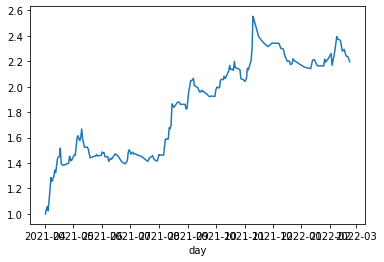

In [8]:
dfResult['day'] = dfResult.date.map(lambda x:x.date())
(dfResult.groupby(by='day')['asset'].sum()+1).cumprod().plot()

In [76]:
a

datetime.datetime(2021, 1, 1, 2, 1)

In [ ]:
import pyupbit
import pandas as pd
from datetime import datetime
import time
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

class BackTest():
    def __init__():
        self.dfCoinDataAll = pd.read_pickle('test.pkl')
        self.listTargetCoins  = ['KRW-BTC','KRW-ETH','KRW-LTC','KRW-XRP']
        self.dateEndBacktest = datetime.now()
        self.dateStartBacktest = self.dateEndBacktest - relativedelta(months=3)
    
    def defineCoinData():
        self.dfCoinData = self.dfCoinDataAll[self.dfCoinDataAll.date>=self.dateStartBacktest-relativedelta(days=10) & self.dfCoinDataAll.date <= self.dateEndBacktest+relativedelta(days=10)]
        
        
    def defineTradingCoins(theDate : datetime) :
        # 변동성 돌파 전략
        listTradingCoinsTemp = [ strategyVolatilityBreakout(theCoin, theDate) for theCoin in self.listTargetCoins ]
        #전략 및 필터 검토 ( 나중에는 전략, 필터 별로 별도의 함수or파일 생성 import strategy)
        # -> 전략을 함수로 만든다음에, 종목 list에서 list compresion을 거쳐 통과하면 종목명, 아니면 0 가져오게 해서 필터링.
        return [ coin for coin in listTradingCoinsTemp if coin != 0 ]
    
    def strategyVolatilityBreakout(theCoin, theDate):
        if theCoin == 0:
            result = 0
        else:   
            k_value = 0.5
            dfCoinData_temp = self.dfCoinData[ (self.dfCoinData.coin == theCoin) & (self.dfCoinData.date<=theDate) & (self.dfCoinData.date > (theDate-relativedelta(hours=50)))]
            dfCoinData_temp.index = dfCoinData_temp.date
            dfCoin = dfCoinData_temp[['open','high','low','close']]
            if len(dfCoin) == 0:
                dfCoin = pyupbit.get_ohlcv(ticker=theCoin, interval='minute60', to=theDate, count=50)
            dfCoin['day'] = dfCoin.index.map( lambda x : x.day )
            dfCoinToday = dfCoin[dfCoin.day == theDate.day]
            dfCoinDayBefore = dfCoin[dfCoin.day == (theDate-relativedelta(days=1)).day]
            range_value = dfCoinDayBefore.high.max() - dfCoinDayBefore.low.min()
            start_price = dfCoinToday.iloc[0]['open']
            base_price = dfCoinToday.iloc[-1]['close']
            if base_price > start_price + range_value * k_value:
                result = theCoin
            else:
                result = 0
        return result
    
    def defineTradingPortions(listTradingCoins) :
        # 대상종목 수에 따라 동일 비중으로 분배
        listTradingPortions = [ 1/len(listTradingCoins) for i in range(len(listTradingCoins)) ]
        # 종목별로 비중 조절
        # 결과 제출
        return listTradingPortions

    def calculateReturnRate(theCoin , dateStartTrade , dateEndTrade):
        """
        종목 기간
        output : 수익률
        """
        tradePerDay=24
        dfCoinData_temp = dfCoinData[ (dfCoinData.coin == theCoin) & (dfCoinData.date<=dateEndTrade) & (dfCoinData.date >= dateStartTrade) ]
        listClose = list(dfCoinData_temp['close'])
        if len(listClose) == 0:
            listClose = list(pyupbit.get_ohlcv(ticker=theCoin, interval='minute60', to=dateEndTrade, count=tradePerDay + 1 )['close'])
    #     print(list(listClose))
        returnRate = ( listClose[-1] - listClose[0] ) / listClose[0]
        return returnRate

    def runSingleTrading(tradingCoins , tradingValues , dateStartTrade):
        """
        매수종목, 금액
        매도
        output : 매매결과
        """

        dateEndTrade = dateStartTrade + relativedelta(days=1)

        tradingReturnRates = [ calculateReturnRate(theCoin , dateStartTrade , dateEndTrade) for theCoin in tradingCoins ]
        tradingReturns = [ valueCoin * returnCoin for valueCoin , returnCoin in zip ( tradingValues , tradingReturnRates ) ]

        return sum(tradingReturns) , dateEndTrade
    
    def runBackTest(listCoins , dateStartBacktest , dateEndBacktest) :
        """
        input : 타임프레임
        매수조건 (가격, 시점)
        매도조건 (가격, 시점) : 24시간뒤. stop loss
        output : CAGR, MDD, W/L, 손익비
        """
    #     dateStartBacktest = datetime(2021,6,10,0,0)
    #     dateEndBacktest = datetime(2021,6,20,0,0)
        dateStartTrade = dateStartBacktest
        dfReturn = pd.DataFrame(data=[[dateStartBacktest , 0 ]] )
        while dateStartTrade < dateEndBacktest :
    #         if dateStartTrade.hour == 0:
    #             print(dfReturn)
    #         print(dateStartTrade)
            tradingAsset = 1 / 24
            tradingCoins = defineTradingCoins(listCoins, dateStartTrade)
    #         print(tradingCoins)
            if len(tradingCoins) == 0:
                dateStartTrade = dateStartTrade + relativedelta(hours=1)
                continue
            tradingPortions = defineTradingPortions(tradingCoins) 
            tradingAssetPortions = [ portion * tradingAsset for portion in tradingPortions]
            returnSingleTrading , dateEndTrade  = runSingleTrading(tradingCoins,tradingAssetPortions,dateStartTrade) 
    #         print(dateEndTrade, returnSingleTrading)
            dfReturn = dfReturn.append( [[ dateEndTrade, returnSingleTrading ]] )
            dateStartTrade = dateStartTrade + relativedelta(hours=1)
        dfReturn.columns = [ 'date' , 'asset']
        return dfReturn 

In [35]:
a = datetime(2011,1,1,1,2,2,1)
b = datetime(2011,1,1,1,3,1,1)
b-a

datetime.timedelta(seconds=59)

In [5]:
def runBackTest(listCoins , dateStartBacktest , dateEndBacktest) :
    
    """
    input : 타임프레임
    매수조건 (가격, 시점)
    매도조건 (가격, 시점) : 24시간뒤. stop loss
    output : CAGR, MDD, W/L, 손익비
    """
#     dateStartBacktest = datetime(2021,6,10,0,0)
#     dateEndBacktest = datetime(2021,6,20,0,0)
    dateStartTrade = dateStartBacktest
    dfReturn = pd.DataFrame(data=[[dateStartBacktest , 0 , '']] )
    while dateStartTrade < dateEndBacktest :
        if dateStartTrade.hour == 0:
            print(dateStartTrade)
#         print(dateStartTrade)
#         timeStart = datetime.now()
#         timeStep1 = datetime.now()
        try:
            tradingAsset = 1 / 24
            tradingCoins = defineTradingCoins(listCoins, dateStartTrade)
    #         timeStep2 = datetime.now()
            if len(tradingCoins) == 0:
                dateStartTrade = dateStartTrade + relativedelta(hours=1)
                continue
            tradingPortions = defineTradingPortions(tradingCoins) 
    #         timeStep3 = datetime.now()
            tradingAssetPortions = [ portion * tradingAsset for portion in tradingPortions]
            returnSingleTrading , dateEndTrade  = runSingleTrading(tradingCoins,tradingAssetPortions,dateStartTrade) 
    #         print(dateEndTrade, returnSingleTrading)
    #         timeStep4 = datetime.now()
            dfReturn = dfReturn.append( [[ dateEndTrade, returnSingleTrading, tradingCoins ]] )
        except:
            print(dateStartTrade)
            
        dateStartTrade = dateStartTrade + relativedelta(hours=1)
#         timeStep5 = datetime.now()
#         print(timeStep2-timeStep1,timeStep3-timeStep2,timeStep4-timeStep3,timeStep5-timeStep4)
    dfReturn.columns = [ 'date' , 'asset' , 'coins']
    return dfReturn 

def defineTradingCoins( listTargetCoins : list=[] , theDate : datetime=datetime.now() ) :
    # 변동성 돌파 전략
    listTradingCoins = [ strategyVolatilityBreakout(theCoin, theDate) for theCoin in listTargetCoins ]
    #전략 및 필터 검토 ( 나중에는 전략, 필터 별로 별도의 함수or파일 생성 import strategy)
    # -> 전략을 함수로 만든다음에, 종목 list에서 list compresion을 거쳐 통과하면 종목명, 아니면 0 가져오게 해서 필터링.
    return [ coin for coin in listTradingCoins if coin != 0 ]

def strategyVolatilityBreakout(theCoin, theDate):
    if theCoin == 0:
        result = 0
    else:   
        k_value = 0.5
        dfCoinData_temp = dfCoinData[ (dfCoinData.coin == theCoin) & (dfCoinData.date<=theDate) & (dfCoinData.date > (theDate-relativedelta(hours=50)))]
        dfCoinData_temp.index = dfCoinData_temp.date
        dfCoin = dfCoinData_temp[['open','high','low','close']]
#         print(dfCoin)
        if len(dfCoin) == 0:
            dfCoin = pyupbit.get_ohlcv(ticker=theCoin, interval='minute60', to=theDate, count=50)
        dfCoin['day'] = dfCoin.index.map( lambda x : x.day )
        dfCoinToday = dfCoin[dfCoin.day == theDate.day]
        dfCoinDayBefore = dfCoin[dfCoin.day == (theDate-relativedelta(days=1)).day]
        range = dfCoinDayBefore.high.max() - dfCoinDayBefore.low.min()
        start_price = dfCoinToday.iloc[0]['open']
        base_price = dfCoinToday.iloc[-1]['close']
        if base_price > start_price + range * k_value:
            result = theCoin
        else:
            result = 0
    return result

def defineTradingPortions(listTradingCoins) :
    # 대상종목 수에 따라 동일 비중으로 분배
    listTradingPortions = [ 1/len(listTradingCoins) for i in range(len(listTradingCoins)) ]
    # 종목별로 비중 조절
    # 결과 제출
    return listTradingPortions

def calculateReturnRate(theCoin , dateStartTrade , dateEndTrade):
    """
    종목 기간
    output : 수익률
    """
    tradePerDay=24
    dfCoinData_temp = dfCoinData[ (dfCoinData.coin == theCoin) & (dfCoinData.date<=dateEndTrade) & (dfCoinData.date >= dateStartTrade) ]
    listClose = list(dfCoinData_temp['close'])
    if len(listClose) == 0:
        listClose = list(pyupbit.get_ohlcv(ticker=theCoin, interval='minute60', to=dateEndTrade, count=tradePerDay + 1 )['close'])
#     print(list(listClose))
    returnRate = ( listClose[-1] - listClose[0] ) / listClose[0]
    return returnRate

def runSingleTrading(tradingCoins , tradingValues , dateStartTrade):
    """
    매수종목, 금액
    매도
    output : 매매결과
    """
    
    dateEndTrade = dateStartTrade + relativedelta(days=1)

    tradingReturnRates = [ calculateReturnRate(theCoin , dateStartTrade , dateEndTrade) for theCoin in tradingCoins ]
    tradingReturns = [ valueCoin * returnCoin for valueCoin , returnCoin in zip ( tradingValues , tradingReturnRates ) ]

    return sum(tradingReturns) , dateEndTrade